In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Demo data - Sheet1.csv")
data.head()

,Income (in 1000 dollars),Total Assests Value (in 100 dollars),Deafult or Not
0,5,300,Defaulter
1,10,150,Defaulter
2,10,350,Defaulter
3,10,420,Defaulter
4,15,220,Defaulter


In [4]:
data.columns

Index(['Income (in 1000 dollars)', 'Total Assests Value (in 100 dollars)',
       'Deafult or Not'],
      dtype='object')

In [5]:
data.head(8)

,Income (in 1000 dollars),Total Assests Value (in 100 dollars),Deafult or Not
0,5,300,Defaulter
1,10,150,Defaulter
2,10,350,Defaulter
3,10,420,Defaulter
4,15,220,Defaulter
5,17,430,Defaulter
6,30,600,Non Default
7,30,710,Non Default


In [6]:
label_mapper = {"Defaulter":0, "Non Default":1}
data["label"] = data[data.columns[-1]].map(label_mapper)
data.head()

,Income (in 1000 dollars),Total Assests Value (in 100 dollars),Deafult or Not,label
0,5,300,Defaulter,0
1,10,150,Defaulter,0
2,10,350,Defaulter,0
3,10,420,Defaulter,0
4,15,220,Defaulter,0


In [7]:
df1 = data[data["Deafult or Not"] == "Defaulter"]
df2 = data[data["Deafult or Not"] == "Non Default"]

In [8]:
df2

,Income (in 1000 dollars),Total Assests Value (in 100 dollars),Deafult or Not,label
6,30,600,Non Default,1
7,30,710,Non Default,1
8,35,310,Non Default,1
9,35,450,Non Default,1
10,37,520,Non Default,1
11,40,630,Non Default,1
12,42,305,Non Default,1
13,44,400,Non Default,1


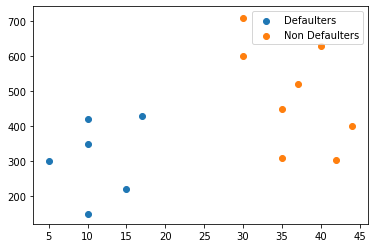

In [9]:
plt.scatter(df1["Income (in 1000 dollars)"], df1["Total Assests Value (in 100 dollars)"], label = "Defaulters")
plt.scatter(df2["Income (in 1000 dollars)"], df2["Total Assests Value (in 100 dollars)"], label = "Non Defaulters")
plt.legend(loc = "best")
plt.show()

In [10]:
d1 = np.array([[1,2,3],[2,3,4]])
d1

array([[1, 2, 3],
       [2, 3, 4]])

In [11]:
d1.shape

(2, 3)

In [12]:
d2 = np.array([[2,3],[4,5],[5,6]])

In [13]:
d2.shape

(3, 2)

In [14]:
d3 = d1 @ d2

In [15]:
d3.shape

(2, 2)

In [16]:
d4 = np.array([1,2,3])

In [17]:
d4.shape

(3,)

In [18]:
d5 = np.array([4,5,6])

In [19]:
d5 @ d4

32

In [21]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [22]:
def prediction_function(X, theta):
    return sigmoid(X @ theta)

In [24]:
def cost_function(preds, y):
    m = len(preds)
    epsilon = 1/100000
    return (-y @ np.log(preds + epsilon) - (1- y) @ np.log(1 - preds  + epsilon))/m

In [35]:
def calculate_update(theta, X, y):
    preds = prediction_function(X, theta)
    m = len(y)
    update = 1/m * X.T @ (preds - y)
    return update

In [65]:
learning_rate = 0.00001
n_iter = 1000
y = data.iloc[:,-1]
theta = np.random.uniform(-1/np.sqrt(2), 1/np.sqrt(2), 3)
X = np.concatenate((np.ones(data.shape[0]).reshape((-1,1)),data.iloc[:,:2].values), axis = 1)


loss = []
for i in range(n_iter):
    update = calculate_update(theta, X, y)
    pred = prediction_function(X, theta)
    loss.append(cost_function(pred, y))
    theta -= update * learning_rate

In [66]:
theta

array([-0.54199429,  0.47251243, -0.01952861])

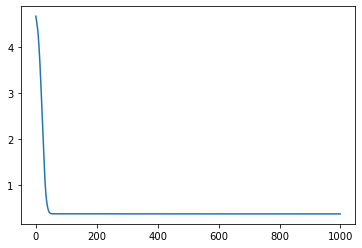

In [67]:
plt.plot([i for i in range(len(loss))],loss)
plt.show()

In [68]:
theta

array([-0.54199429,  0.47251243, -0.01952861])

In [69]:
prediction_function(X, theta)

array([0.0173269 , 0.77796354, 0.06587295, 0.01765563, 0.90459854,
       0.28769884, 0.8717153 , 0.4422744 , 0.99995189, 0.99925996,
       0.99887189, 0.9976605 , 0.9999984 , 0.99999603])

In [70]:
data

,Income (in 1000 dollars),Total Assests Value (in 100 dollars),Deafult or Not,label
0,5,300,Defaulter,0
1,10,150,Defaulter,0
2,10,350,Defaulter,0
3,10,420,Defaulter,0
4,15,220,Defaulter,0
5,17,430,Defaulter,0
6,30,600,Non Default,1
7,30,710,Non Default,1
8,35,310,Non Default,1
9,35,450,Non Default,1


In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logreg = LogisticRegression()
logreg.fit(data.iloc[:,:2], y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
logreg.predict_proba(data.iloc[:,:2])

array([[0.90934861, 0.09065139],
       [0.49409469, 0.50590531],
       [0.82341081, 0.17658919],
       [0.88961035, 0.11038965],
       [0.3467456 , 0.6532544 ],
       [0.63304038, 0.36695962],
       [0.24344756, 0.75655244],
       [0.43190525, 0.56809475],
       [0.01037963, 0.98962037],
       [0.03037764, 0.96962236],
       [0.03296405, 0.96703595],
       [0.03867331, 0.96132669],
       [0.00199283, 0.99800717],
       [0.00263452, 0.99736548]])